In [2]:
from tevatron.datasets.dataset import load_dataset

2022-11-24 02:50:51.339963: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [3]:
dataset = load_dataset("Tevatron/msmarco-passage",
                      "default",
                      data_files=None, cache_dir=None)

Found cached dataset msmarco-passage (/home/y247xie/.cache/huggingface/datasets/Tevatron___msmarco-passage/default/0.0.1/1874f5d9ae5257b9dbc7d8f89c76f8d4c321be6b660bb5df208e5e64decfa978)


  0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
corpus_scifact = load_dataset("Tevatron/scifact-corpus",
                      "default",
                      data_files=None, cache_dir=None)

Found cached dataset scifact-corpus (/home/y247xie/.cache/huggingface/datasets/Tevatron___scifact-corpus/default/0.0.1/8948d3e93e6cb7a49810edef4f9bca033e134e7c4bbd831018cff8831848c37c)


  0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
corpus_scifact['train'][5]

{'docid': '33370',
 'text': 'Glioblastomas are deadly cancers that display a functional cellular hierarchy maintained by self-renewing glioblastoma stem cells (GSCs). GSCs are regulated by molecular pathways distinct from the bulk tumor that may be useful therapeutic targets. We determined that A20 (TNFAIP3), a regulator of cell survival and the NF-kappaB pathway, is overexpressed in GSCs relative to non-stem glioblastoma cells at both the mRNA and protein levels. To determine the functional significance of A20 in GSCs, we targeted A20 expression with lentiviral-mediated delivery of short hairpin RNA (shRNA). Inhibiting A20 expression decreased GSC growth and survival through mechanisms associated with decreased cell-cycle progression and decreased phosphorylation of p65/RelA. Elevated levels of A20 in GSCs contributed to apoptotic resistance: GSCs were less susceptible to TNFalpha-induced cell death than matched non-stem glioma cells, but A20 knockdown sensitized GSCs to TNFalpha-medi

In [6]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')


/home/y247xie/miniconda3/envs/tevatron/lib/python3.8/site-packages/huggingface_hub/snapshot_download.py:6: FutureWarning: snapshot_download.py has been made private and will no longer be available from version 0.11. Please use `from huggingface_hub import snapshot_download` to import the only public function in this module. Other members of the file may be changed without a deprecation notice.
  warnings.warn(


In [8]:
# encode scifact corpus
# get scifact domain embedding
docid2doc_embedding_scifact = {}
for example in corpus_scifact['train']:
    docid = example['docid']
    text = example['text']
    doc_embeddings = model.encode(text)
    docid2doc_embedding_scifact[docid] = doc_embeddings
    
import numpy as np
doc_embedding_scifact = sum(
    docid2doc_embedding_scifact[docid] for docid in docid2doc_embedding_scifact) / len(docid2doc_embedding_scifact)

In [12]:
# # encode fiqa corpus
# # get fiqa domain embedding
# import tqdm
# docid2doc_embedding_fiqa = {}
# doc_batch = []
# docid_batch = []
# for example in tqdm.tqdm(corpus_fiqa['train']):
#     docid = example['docid']
#     text = example['text']
#     doc_batch.append(text)
#     docid_batch.append(docid)
#     if len(docid_batch) == 512:
#         doc_embeddings = model.encode(doc_batch)
#         for i, docid in enumerate(docid_batch):
#             docid2doc_embedding_fiqa[docid] = doc_embeddings[i]
#         doc_batch = []
#         docid_batch = []

# if len(docid_batch) > 0:
#     doc_embeddings = model.encode(doc_batch)
#     for i, docid in enumerate(docid_batch):
#         docid2doc_embedding_fiqa[docid] = doc_embeddings[i]
        
# import numpy as np
# doc_embedding_fiqa = sum(
#     docid2doc_embedding_fiqa[docid] for docid in docid2doc_embedding_fiqa) / len(docid2doc_embedding_fiqa)

In [ ]:
len(doc_batch), len(docid_batch), doc_embeddings.shape

In [38]:
import numpy as np
scores = np.dot(doc_embedding_fiqa, np.array(doc_embeddings_msmarco).T)
sim_docids = [(docs_msmarco[i], score, docids_msmarco[i]) for i, score in enumerate(scores)]
sim_docids = sorted(sim_docids, key=lambda x: x[1], reverse=True)
# sorted_qids = [qid for _, _, qid in sim_pids]
# qid2score = {qid: score for _, score, qid in sim_pids}

In [40]:
sim_docids[:100]

[("It's not surprising that Warren Buffett's investment strategy has reached mythical proportions. A $8,175 investment in Berkshire Hathaway (NYSE:BRK.A) in January 1990 was worth more than $165,000 by September 2013, while $8,175 in the S&P 500 would have grown to $42,000 within the aforementioned timeframe. But how did Buffett do it? Below are the most important tenets of Buffett's investment philosophy.",
  0.1280104,
  '2843664'),
 ("The Politics of Money by Gregory Mannarino is a wide-ranging work that provides an insider's view of the major issues involved in the current (and worse to come) U.S. financial disaster.",
  0.12713526,
  '3451266'),
 ('And we know that most bankruptcies in the US are related to medical expenses. The market driven US health care system murders more people than all the terrorist groups put together. I commented on the recent meningitis outbreak another example of market failure with devastating results.',
  0.12344028,
  '2243074'),
 ("People w ou i l d

In [85]:
sim_docids[:100]

[("It's not surprising that Warren Buffett's investment strategy has reached mythical proportions. A $8,175 investment in Berkshire Hathaway (NYSE:BRK.A) in January 1990 was worth more than $165,000 by September 2013, while $8,175 in the S&P 500 would have grown to $42,000 within the aforementioned timeframe. But how did Buffett do it? Below are the most important tenets of Buffett's investment philosophy.",
  0.11910554,
  '2843664'),
 ('Finance & IT: the transforming power of technology; Over the years, technology has reshaped the finance function--and sparked a profound change in the way business is done. But, surprisingly, much has stayed the same. A look at the juncture of business, finance and technology',
  0.11899313,
  '1517598'),
 ("Investing in a clean energy future. We're investing in clean energy so it's more accessible for our company and for everyone. And we've done that in ways that make business sense. In fact, we've made agreements to fund over $2 billion in renewable

In [19]:
# corpus_msmarco = load_dataset("Tevatron/msmarco-passage-corpus",
#                       "default",
#                       data_files=None, cache_dir=None)

Found cached dataset msmarco-passage-corpus (/home/y247xie/.cache/huggingface/datasets/Tevatron___msmarco-passage-corpus/default/0.0.1/3d8add51914a7d2b589d09e37f4cd9646ebe4a3bad6d59b4e3702cfcc9941f23)


  0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
# len(corpus_msmarco['train'])

8841823

In [33]:
l = 0
for example in dataset['train']:
    for doc in example['positive_passages']:
        break
    break

In [40]:
doc

{'docid': '1108465',
 'title': 'Vernon, TX',
 'text': 'Sponsored Topics. Vernon is a city in Wilbarger County, Texas, United States. As of the 2000 census, the population was 11,660; it was 11,077 in the 2005 census estimate. Vernon is the county seat of Wilbarger County. Vernon is the birthplace of rock and roll singer/musician Roy Orbison and jazz trombonist Jack Teagarden.'}

In [13]:
%%time

import tqdm
docid2doc_embedding = {}
doc_batch = []
docid_batch = []
docs_msmarco = []
docids_msmarco = []
doc_embeddings_msmarco = []
docids = set()
for example in dataset['train']:
    for doc in example['positive_passages']:
        if doc['docid'] in docids:
            continue
        docids.add(doc['docid'])
        doc_batch.append(doc['text'])
        docid_batch.append(doc['docid'])
        docs_msmarco.append(doc['text'])
        docids_msmarco.append(doc['docid'])
        if len(docid_batch) == 512:
            doc_embeddings = model.encode(doc_batch)
            for i, docid in enumerate(docid_batch):
                docid2doc_embedding[docid] = doc_embeddings[i]
                doc_embeddings_msmarco.append(doc_embeddings[i])
            doc_batch = []
            docid_batch = []

if len(docid_batch) > 0 :
    doc_embeddings = model.encode(doc_batch)
    for i, docid in enumerate(docid_batch):
        docid2doc_embedding[docid] = doc_embeddings[i]
        doc_embeddings_msmarco.append(doc_embeddings[i])
        


CPU times: user 1h 8min 32s, sys: 3min 3s, total: 1h 11min 36s
Wall time: 26min 24s


In [ ]:
import numpy as np
scores = np.dot(doc_embedding_scifact, np.array(doc_embeddings_msmarco).T)
# sim_docids = [(docs_msmarco[i], score, docids_msmarco[i]) for i, score in enumerate(scores)]
# sim_docids = sorted(sim_docids, key=lambda x: x[1], reverse=True).
sorted_qids = [qid for _, _, qid in sim_pids]
qid2score = {qid: score for _, score, qid in sim_pids}

In [ ]:
sim_docids[:100]

In [14]:
dataset_scifact = load_dataset("Tevatron/scifact",
                      "default",
                      data_files=None, cache_dir=None)

Found cached dataset scifact (/home/y247xie/.cache/huggingface/datasets/Tevatron___scifact/default/0.0.1/0407c8eb5881d4870a4474489aeb475222ebc3febda54c236dc871ea69cd85b2)


  0%|          | 0/3 [00:00<?, ?it/s]

In [109]:
dataset_fiqa = load_dataset("Tevatron/beir",
                      "fiqa",
                      data_files=None, cache_dir=None)

Found cached dataset beir (/home/y247xie/.cache/huggingface/datasets/Tevatron___beir/fiqa/1.0.0/bbd662c3d4cd99695bdc9c251b14cb18c0fcc7cb571d8373c5746b97789a4b9a)


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# data_dir = "/Users/dlituiev/repos/datasets/bioasq/"
# bioasq_task_b = load_dataset("aps/bioasq_task_b", name="bioasq_9b_source")

In [13]:
>>> import numpy as np
>>> from sklearn.manifold import TSNE
>>> X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
>>> Y = TSNE(n_components=2, learning_rate='auto',
...                   init='random', perplexity=3).fit_transform(X)
>>> Y.shape

(4, 2)

In [32]:
len(doc_batch)

57638

In [15]:
doc_embeddings_scifact = [docid2doc_embedding_scifact[docid] for docid in docid2doc_embedding_scifact]
# doc_embeddings_fiqa = [docid2doc_embedding_fiqa[docid] for docid in docid2doc_embedding_fiqa]

In [16]:
scores = np.dot(doc_embedding_scifact, np.array(doc_embeddings_msmarco).T)
sim_docids = [(docs_msmarco[i], score, docids_msmarco[i]) for i, score in enumerate(scores)]
sim_docids = sorted(sim_docids, key=lambda x: x[1], reverse=True)

docid2score = {docid: score for _, score, docid in sim_docids}

In [17]:
for docid in docid2doc_embedding:
    if docid2score[docid] > 0.08:
        msmarco_sample.append(docid2doc_embedding[docid])
msmarco_sample = random.sample(msmarco_sample, 100)

NameError: name 'msmarco_sample' is not defined

In [ ]:
import random
msmarco_sample2 = random.sample(doc_embeddings_msmarco, 1000)
scifact_sample = random.sample(doc_embeddings_scifact, 100)
# fiqa_sample = random.sample(doc_embeddings_fiqa, 100)

In [101]:
samples = np.concatenate([msmarco_sample, msmarco_sample2, scifact_sample]) # fiqa_sample scifact_sample fiqa_sample

In [102]:
Y = TSNE(n_components=2, learning_rate='auto',
                   init='random', perplexity=3).fit_transform(samples)

In [77]:
len(doc_embeddings_msmarco), len(docid2doc_embedding_scifact), len(docid2doc_embedding_fiqa)

(416582, 5183, 57638)

(-99.02852439880371,
 91.06619071960449,
 -102.58668174743653,
 102.22362174987794)

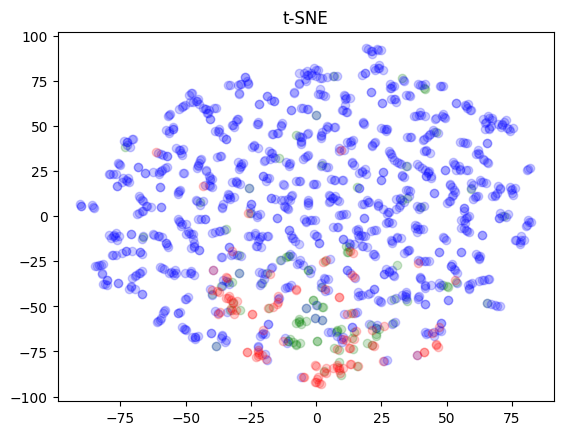

In [105]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_title("t-SNE")
alpha=0.2
# ax.scatter(Y[red, 0], Y[red, 1], c="r")
ax.scatter(Y[:len(msmarco_sample), 0], Y[:len(msmarco_sample), 1], c="g", alpha=alpha)
ax.scatter(Y[len(msmarco_sample):len(msmarco_sample)+len(msmarco_sample2), 0], Y[len(msmarco_sample):len(msmarco_sample)+len(msmarco_sample2), 1], c="b", alpha=alpha)
ax.scatter(Y[len(msmarco_sample)+len(msmarco_sample2):, 0], Y[len(msmarco_sample)+len(msmarco_sample2):, 1], c="r", alpha=alpha)

# ax.scatter(Y[1100:1200, 0], Y[1100:1200, 1], c="b")
# ax.xaxis.set_major_formatter(NullFo?rmatter())
# ax.yaxis.set_major_formatter(NullFor?matter())
ax.axis("tight")

In [1]:
# import datasets
# datasets.list_datasets()

['acronym_identification',
 'ade_corpus_v2',
 'adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews',
 'allocine',
 'alt',
 'amazon_polarity',
 'amazon_reviews_multi',
 'amazon_us_reviews',
 'ambig_qa',
 'americas_nli',
 'ami',
 'amttl',
 'anli',
 'app_reviews',
 'aqua_rat',
 'aquamuse',
 'ar_cov19',
 'ar_res_reviews',
 'ar_sarcasm',
 'arabic_billion_words',
 'arabic_pos_dialect',
 'arabic_speech_corpus',
 'arcd',
 'arsentd_lev',
 'art',
 'arxiv_dataset',
 'ascent_kb',
 'aslg_pc12',
 'asnq',
 'asset',
 'assin',
 'assin2',
 'atomic',
 'autshumato',
 'babi_qa',
 'banking77',
 'bbaw_egyptian',
 'bbc_hindi_nli',
 'bc2gm_corpus',
 'beans',
 'best2009',
 'bianet',
 'bible_para',
 'big_patent',
 'billsum',
 'bing_coronavirus_query_set',
 'biomrc',
 'biosses',
 'blbooks',
 'blbooksgenre',
 'blended_skill_talk',
 'blimp',
 'blog_authorship_corpus',
 'bn_hate_speech',
 'bnl_newspapers',
 'bookcorpus',
 'bookcorpusopen'

In [88]:
# dataset_bioasq = load_dataset("beir/bioasq-generated-queries")

In [15]:
import datasets
datasets.__version__

'2.7.0'

In [111]:
for data in dataset_fiqa['test']:
    ls.append(len(data['query'].split()))

{'query_id': '9188',
 'query': 'Selling mutual fund and buying equivalent ETF: Can I 1031 exchange?'}

In [23]:
corpus_fiqa = load_dataset("Tevatron/beir-corpus",
                      "fiqa",
                      data_files=None, cache_dir=None)

Found cached dataset beir-corpus (/home/y247xie/.cache/huggingface/datasets/Tevatron___beir-corpus/fiqa/1.1.0/02e1318cd9412cdf85d3f039bf36bec0af49ddeeab2279d4cf19fe556af6f29a)


  0%|          | 0/1 [00:00<?, ?it/s]

In [73]:
corpus_fiqa['train'][0]

{'docid': '3',
 'title': '',
 'text': "I'm not saying I don't like the idea of on-the-job training too, but you can't expect the company to do that. Training workers is not their job - they're building software. Perhaps educational systems in the U.S. (or their students) should worry a little about getting marketable skills in exchange for their massive investment in education, rather than getting out with thousands in student debt and then complaining that they aren't qualified to do anything."}

In [68]:
dataset_fiqa['test']

Dataset({
    features: ['query_id', 'query'],
    num_rows: 648
})

In [89]:
# get qid2score based on docid2score
docid2score = {docid: score for _, score, docid in sim_docids}

qid2query = {}
qid2score = {}
for example in dataset['train']:
    qid = example['query_id']
    qid2query[qid] = example['query']
    for doc in example['positive_passages']:
        score = docid2score[doc['docid']]
        if qid not in qid2score:
            qid2score[qid] = score
        else:
            qid2score[qid] = max(qid2score[qid], score)

In [93]:
scores = sorted([(qid, score) for qid, score in qid2score.items()], key=lambda x:x[1], reverse=True)
for qid, score in scores[:100]:
    print(score, qid2query[qid])

0.11910554 what is warren buffett investing in
0.11899313 it finance definition
0.11889665 do energy management systems make sense from a business point of view
0.117628634 advantages of having money
0.1175263 define the term opportunity cost
0.11745663 why health care is a market failure
0.117373295 most expensive stock firms
0.11689476 who is gregory mannarino
0.11575237 what type of industry is a holding company
0.1151264 how much is ge pension underfunded
0.11381014 preferred stock 1x liquidation preference
0.11318429 Good Financial Status definition
0.11245075 define nonfungible role
0.11051834 what is uma investment account
0.11043009 do roofing companies provide finance options
0.110125564 what is growth low
0.10993134 what challenges faces a financial manager
0.10853818 is ge a good buy
0.10683453 what is overcapitalization
0.1065698 does tesla negotiate price
0.10635805 is the tobacco industry dying
0.10619445 what is finserv
0.10610511 stock price maximization requires _____.

In [96]:
import pickle
pickle.dump(qid2score, open("qid2score_by_doc_fiqa.pkl", "wb"))

In [27]:
import tqdm
qid2query_embedding = {}
query_batch = []
qid_batch = []
queries_msmarco = []
qids_msmarco = []
embeddings_msmarco = []
for data in tqdm.tqdm(dataset['train']):
    query_batch.append(data['query'])
    qid_batch.append(data['query_id'])
    queries_msmarco.append(data['query'])
    qids_msmarco.append(data['query_id'])
    if len(qid_batch) == 512:
        query_embeddings = model.encode(query_batch)
        for i, qid in enumerate(qid_batch):
            qid2query_embedding[qid] = query_embeddings[i]
            embeddings_msmarco.append(query_embeddings[i])
        query_batch = []
        qid_batch = []
            
if len(qid_batch) > 0 :
    query_embeddings = model.encode(query_batch)
    for i, qid in enumerate(qid_batch):
        qid2query_embedding[qid] = query_embeddings[i]
        embeddings_msmarco.append(query_embeddings[i])


100%|█████████████████████████████| 400782/400782 [18:23<00:00, 363.31it/s]


In [16]:
dataset_scifact = load_dataset("Tevatron/scifact",
                      "default",
                      data_files=None, cache_dir=None)

NameError: name 'load_dataset' is not defined

In [18]:
qid2query_embedding_scifact = {}
for data in tqdm.tqdm(dataset_scifact['dev']):
    query_embeddings = model.encode(data['query'])
    qid2query_embedding_scifact[data['query_id']] = query_embeddings

In [19]:
import numpy as np
embedding_scifact = sum(
    qid2query_embedding_scifact[qid] for qid in qid2query_embedding_scifact) / len(qid2query_embedding_scifact)

In [131]:
# embeddings_scifact = np.array([qid2query_embedding_scifact[qid] for qid in qid2query_embedding_scifact])

In [138]:
# total = 0
# count = 0
# scifact_sims = []
# for i, sims in enumerate(np.dot(embeddings_scifact, embeddings_scifact.T)):
#     total += sum(sims) - sims[i]
#     count += len(sims) - 1
#     scifact_sims += list(sims[:i]) + list(sims[i+1:])
    


In [140]:
pd.DataFrame(scifact_sims).describe()

,0
count,89700.000000
mean,0.123611
std,0.113261
min,-0.176934
25%,0.040030
50%,0.110267
75%,0.194651
max,0.998386


In [34]:
import numpy as np
scores = np.dot(embedding_scifact, np.array(embeddings_msmarco).T)
sim_pids = [(queries_msmarco[i], score, qids_msmarco[i]) for i, score in enumerate(scores)]
sim_pids = sorted(sim_pids, key=lambda x: x[1], reverse=True)

In [35]:
sim_pids[:100]

[('_____ can selectively enhance the growth and proliferation of mutated cells.',
  0.20802751,
  '8653'),
 ('Which is a part of the innate immune defenses', 0.19895679, '8219'),
 ('what cells does tbev effect', 0.19841647, '594203'),
 ('what organelle is most active in causing programmed cell death',
  0.19757584,
  '883402'),
 ('what is the function in humans of the protein produced from that gene',
  0.19436993,
  '822257'),
 ('is a disease-fighting protein created', 0.19391418, '399823'),
 ('role of nf kb in inflammatory disease', 0.19186991, '489746'),
 ('what processes are g0 cells unable to do', 0.19105671, '888744'),
 ('what is the ret gene associated with?', 0.1893949, '844271'),
 ('why is receptor mediated endocytosis important', 0.18610172, '1071929'),
 ('inflammation is accompanied by', 0.18576144, '395826'),
 ('what attacks helper t cells?', 0.18470383, '1165309'),
 ('what do nucleosomes inhibit?', 0.18462797, '1162925'),
 ('RNA and polypeptides interact with what cell loc

In [43]:
sorted_qids = [qid for _, _, qid in sim_pids]
qid2score = {qid: score for _, score, qid in sim_pids}

In [148]:
import pickle
pickle.dump(qid2score, open("qid2score.pkl", "wb"))

In [147]:
len(qid2score)

400782

In [51]:
for i in range(len(dataset['train'])):
    dataset['train'][i]['score'] = qid2score[dataset['train'][i]['query_id']]

In [99]:
type(dataset['train'])

datasets.arrow_dataset.Dataset

In [102]:
dataset['train'][1]

{'query_id': '1000684',
 'query': 'where is your perineum',
 'positive_passages': [{'docid': '6133670',
   'title': 'perineum',
   'text': 'That part of the floor of the PELVIS that lies between the tops of the thighs. In the male, the perineum lies between the anus and the scrotum. In the female, it includes the external genitalia. The area between the opening of the vagina and the anus in a woman, or the area between the scrotum and the anus in a man.'}],
 'negative_passages': [{'docid': '6475882',
   'title': 'After the birth',
   'text': 'To help the perineum to heal. 1  Keep the area cold by using a wrapped ice pack for the first 24 to 72 hours. 2  This decreases the pain and swelling which is important for healing and comfort. 3  Have the wrapped ice pack on for 10 to 20 minutes at the most each time. 4  Change sanitary pads often to keep the perineum dry.'},
  {'docid': '8032962',
   'title': 'Basal-cell carcinoma',
   'text': 'Aberrant basal cell carcinoma is characterized by t

In [94]:
def add_score(example):
    example["score"] = qid2score[example['query_id']]
    return example

dataset_train = dataset['train'].map(add_score)

  0%|          | 0/400782 [00:00<?, ?ex/s]

In [95]:
import pandas as pd
pd.DataFrame([qid2score[qid] for qid in qid2score]).describe()

,0
count,400782.000000
mean,0.007558
std,0.017778
min,-0.046677
25%,-0.004420
50%,0.004667
75%,0.016270
max,0.119106


In [99]:
dataset['train'][1]

{'query_id': '1000684',
 'query': 'where is your perineum',
 'positive_passages': [{'docid': '6133670',
   'title': 'perineum',
   'text': 'That part of the floor of the PELVIS that lies between the tops of the thighs. In the male, the perineum lies between the anus and the scrotum. In the female, it includes the external genitalia. The area between the opening of the vagina and the anus in a woman, or the area between the scrotum and the anus in a man.'}],
 'negative_passages': [{'docid': '6475882',
   'title': 'After the birth',
   'text': 'To help the perineum to heal. 1  Keep the area cold by using a wrapped ice pack for the first 24 to 72 hours. 2  This decreases the pain and swelling which is important for healing and comfort. 3  Have the wrapped ice pack on for 10 to 20 minutes at the most each time. 4  Change sanitary pads often to keep the perineum dry.'},
  {'docid': '8032962',
   'title': 'Basal-cell carcinoma',
   'text': 'Aberrant basal cell carcinoma is characterized by t

In [100]:
dataset_train = dataset_train.sort('score')

In [51]:
int(len(dataset_train)/10)

40078

In [53]:
# dataset_train_1  = dataset_train[:int(len(dataset_train)/10)]

In [114]:
i = 0
data_test = dataset_train._getitem(slice(i, i + segment_size), decoded=False)

In [116]:
data_test.keys()

dict_keys(['query_id', 'query', 'positive_passages', 'negative_passages', 'score'])

In [125]:
dataset_train[1]['score']

-0.07216934859752655

In [112]:
dataset_segments_train = []

score_segments = [0.03, 0.08, 1]
score_segments_i = 0
# segment_size = int(len(dataset_train)/10) + 1
pre_i = 0
for i in range(len(dataset_train)):
    if dataset_train[i]['score'] > score_segments[score_segments_i]:
        dataset_segments_train.append(dataset_train[pre_i:i])
        score_segments_i += 1
        pre_i = i
        
dataset_segments_train.append(dataset_train[pre_i:])

In [113]:
[len(d['query']) for d in dataset_segments_train]

[358056, 42005, 721]

In [118]:
dataset_segments_train[2]['query']

['wrap account definition',
 'what is tbh consulting',
 'how did the tva help',
 'why do businesses use microfinance',
 'inflation is good for economy',
 'does royal bank have visa debit card',
 'when total utility is falling, marginal utility is',
 'weiss research trading history',
 'how much do professional poker players make',
 'why is a cash balance plan a defined benefit plan',
 'what is strategic financial planning',
 'what does enterprise cal include',
 'what occurs when a option to buy is exercised',
 'is gnc a franchise',
 'tesla cost of ownership',
 'retail strategy definition',
 'npv banking definition',
 'what kind of supplier relationship',
 'what is the effective interest rate for cash balance',
 'what was hamilton financial plan',
 'what is investment banker',
 'what is an investment banker',
 'what are considered assets for roa',
 'lean six sigma for service is a business improvement methodology that maximizes',
 'largest privately held money manager',
 'what is the mai

In [89]:
# evenly split dataset, doesn't work with learning rate warm up and decay

# dataset_segments_train = []

# segment_size = int(len(dataset_train)/10) + 1
# for i in range(0, len(dataset_train), segment_size):
#     dataset_segments_train.append(dataset_train[i:i+segment_size])

In [119]:
len(dataset_segments_train)

11

In [108]:
dataset_segments_train[2].keys()

dict_keys(['query_id', 'query', 'positive_passages', 'negative_passages', 'score'])

In [83]:
len(dataset_train_1), int(len(dataset_train)/10)

(5, 40078)

In [87]:
len(dataset_train_1['query_id'])

40078

In [80]:
import pandas as pd
pd.DataFrame([score for _, score, qid in sim_pids]).describe()

,0
count,400782.000000
mean,0.012950
std,0.028777
min,-0.075672
25%,-0.005908
50%,0.006377
75%,0.023939
max,0.208028


In [123]:
sum([score > 0 and score < 0.1 for _, score, qid in sim_pids]) 

246996

In [19]:
def load_from_disk(path):
    # process the examples in input and target text format and the eos token at the end
    def process_bio(example):
        example['question'] = example['qas'][0]['question']
        example['answers'] = example['qas'][0]['answers']
        example['id'] = example['qas'][0]['id']

        trivia_example = { 
            'id': example['id'],
            'question': example['question'],
            'answers': example['answers'],
            'context': example['context']}
        return trivia_example
    loaded_dataset = load_dataset('json', data_files=path, field='paragraphs', split='train')
    loaded_dataset = loaded_dataset.map(process_bio,remove_columns=loaded_dataset.column_names)
    return loaded_dataset




In [20]:
load_from_disk("/home/y247xie/01_exps/bioasq_9b_bm25_0.9_0.4_retrieve_top1.json")

Using custom data configuration default-cdb7c26dcef8cf4a


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

DatasetGenerationError: An error occurred while generating the dataset